In [115]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import softmax
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed
from tensorflow.config.experimental import enable_op_determinism

In [2]:
enable_op_determinism()
set_seed(1)

In [3]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#split the training set into a new training set and a validation set
n_val = int(len(x_train)*0.1)

x_val = x_train[:n_val]
y_val = y_train[:n_val]

x_train_nv = x_train[n_val:]
y_train_nv = y_train[n_val:]

In [5]:
def my_model_mbgd(shape, n, classes, learning_rate, x_train, y_train, epochs, batch_size, x_val, y_val):
    """
    Initializes, compiles, and fits a model.
    
    Parameters:
    - shape: tuple, the shape of the input images ((28,28) for minst)
    - n: int, the number of nodes in the hidden layer
    - classes: int, the number of classes (10 for minst)
    - learning_rate: float, the learning rate
    - x_train: numpy.ndarray
    - y_train: numpy.ndarray
    - epochs: int
    - batch_size: int
    - x_val: numpy.ndarray
    - y_val: numpy.ndarray
      
    Returns:
    - The fitted model and the history object.
    """
    
    # initialize model
    model = Sequential([
        Input(shape=shape),
        Flatten(),
        Dense(n, activation="tanh", name="hidden"), # new layer
        Dense(classes)
    ])

    # compile model
    model.compile(optimizer=SGD(learning_rate=learning_rate),
                  loss=SparseCategoricalCrossentropy(from_logits=True), # from_logits=True applies softmax to loss
                  metrics=["accuracy"]
                 )

    # fit model
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))
    
    return model, history

In [6]:
model, history = my_model_mbgd(shape=(28,28),n=300,classes=10,learning_rate=0.01,x_train=x_train_nv,y_train =y_train_nv,epochs=50,batch_size=50,x_val=x_val,y_val=y_val)

2024-04-10 12:40:23.008593: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/50
1080/1080 [==============================] - 8s 7ms/step - loss: 0.5856 - accuracy: 0.8266 - val_loss: 0.3651 - val_accuracy: 0.8957
Epoch 2/50
1080/1080 [==============================] - 7s 7ms/step - loss: 0.3696 - accuracy: 0.8947 - val_loss: 0.3273 - val_accuracy: 0.9102
Epoch 3/50
1080/1080 [==============================] - 7s 7ms/step - loss: 0.3268 - accuracy: 0.9056 - val_loss: 0.2833 - val_accuracy: 0.9218
Epoch 4/50
1080/1080 [==============================] - 7s 7ms/step - loss: 0.2992 - accuracy: 0.9134 - val_loss: 0.2761 - val_accuracy: 0.9242
Epoch 5/50
1080/1080 [==============================] - 7s 7ms/step - loss: 0.2757 - accuracy: 0.9191 - val_loss: 0.2708 - val_accuracy: 0.9228
Epoch 6/50
1080/1080 [==============================] - 7s 7ms/step - loss: 0.2713 - accuracy: 0.9223 - val_loss: 0.2508 - val_accuracy: 0.9290
Epoch 7/50
1080/1080 [==============================] - 7s 7ms/step - loss: 0.2526 - accuracy: 0.9266 - val_loss: 0.2408 - val_accuracy:

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1767 - accuracy: 0.9457


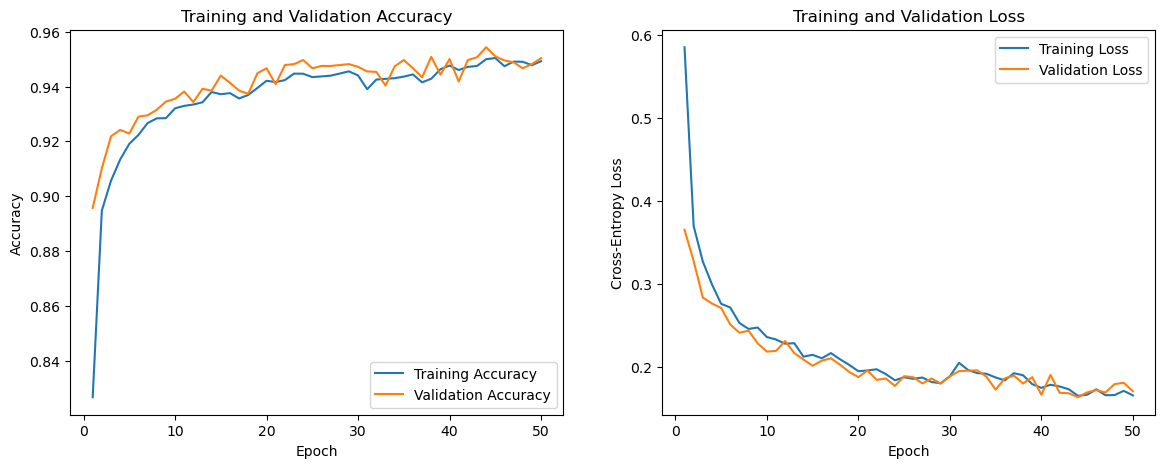

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

# Plot training and validation accuracy per epoch
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [9]:
predictions = model.predict(x_test)
pred_class = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 4ms/step


In [10]:
pred_correct = np.where(pred_class == y_test)[0]
pred_incorrect = np.where(pred_class != y_test)[0]

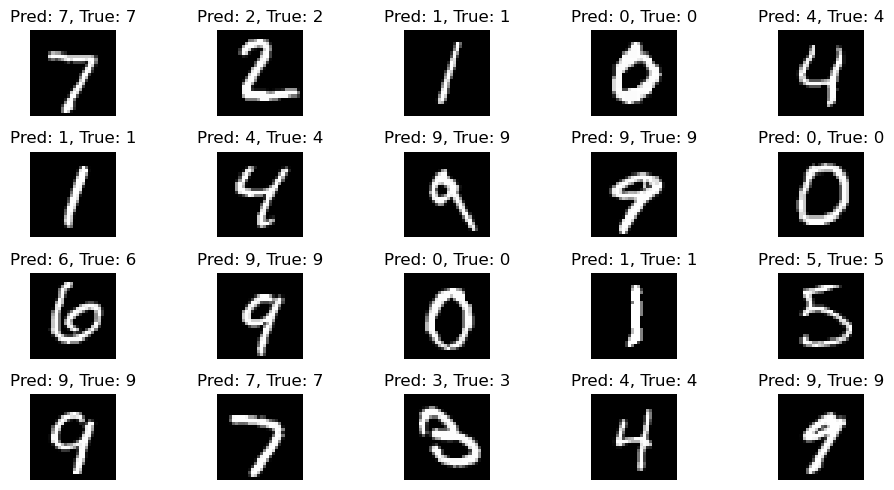

In [11]:
plt.figure(figsize=(10, 5))
for i, correct in enumerate(pred_correct[:20]):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[correct].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_class[correct]}, True: {y_test[correct]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

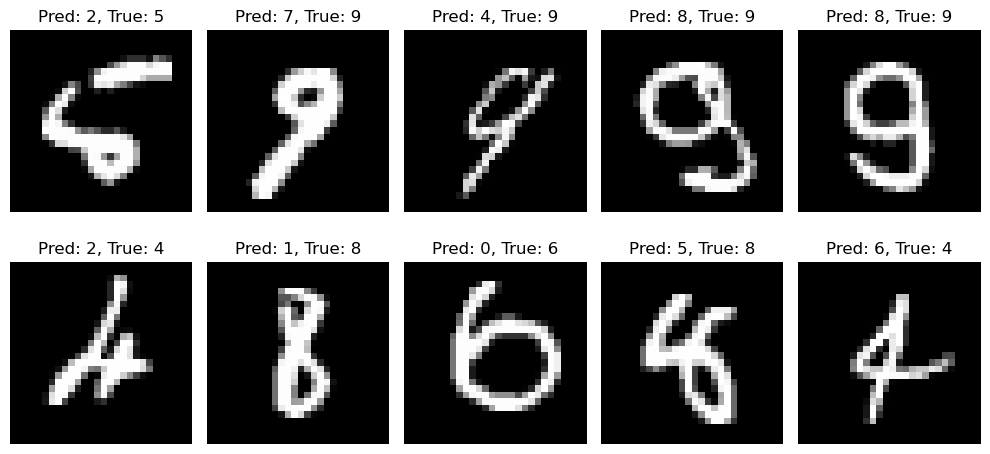

In [12]:
plt.figure(figsize=(10, 5))
for i, incorrect in enumerate(pred_incorrect[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[incorrect].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_class[incorrect]}, True: {y_test[incorrect]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
weights = model.layers[1].weights[0]

In [119]:
all_values = np.reshape(weights, newshape = 28*28*300) # for finding max and min weights attained across all neurons
# for plotting consistent colouring across weight plots
overall_limits = max([abs(min(all_values)), abs(max(all_values))])

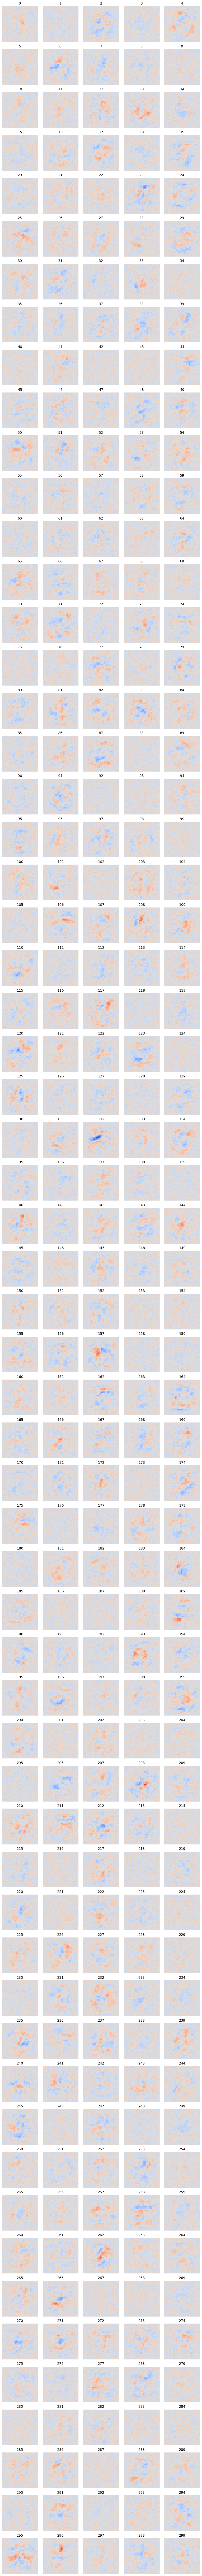

In [120]:
size = 300
plt.figure(figsize=(10, 125))
for i in range(size):
    plt.subplot(int(size/5), 5, i + 1)
    plt.imshow(np.reshape(weights[:, i], (28, 28)), cmap='coolwarm', vmin = -overall_limits, vmax = overall_limits)
    plt.title(i)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [121]:
interesting_w = [132, 157]

In [122]:
interesting_values = [np.reshape(weights[:, interesting_w[0]], 28*28), np.reshape(weights[:, interesting_w[1]], 28*28)]
interesting_values = np.reshape(interesting_values, 2*28*28)
interesting_limit = max([abs(min(interesting_values)), abs(max(interesting_values))]) # for obtaining a colour bar centred at zero

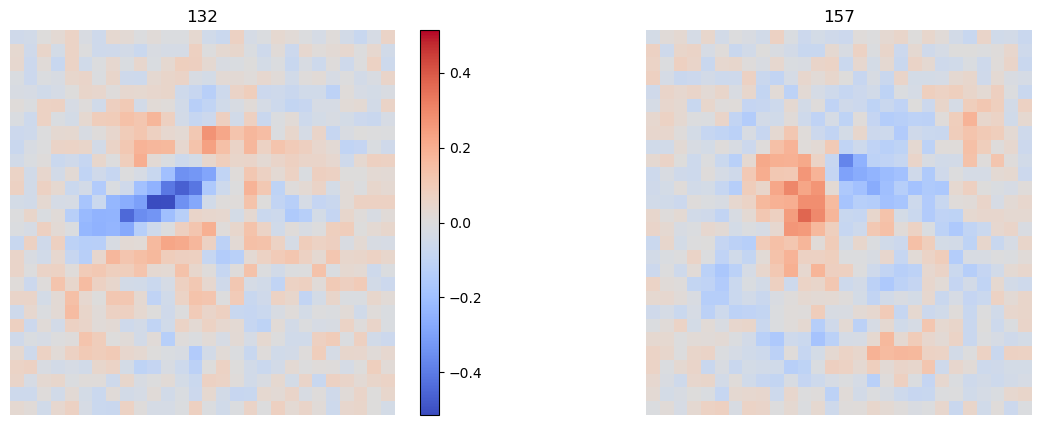

In [123]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(weights[:, interesting_w[0]], (28, 28)), cmap='coolwarm', vmin = -interesting_limit, vmax = interesting_limit)
plt.title(interesting_w[0])
plt.axis('off')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(np.reshape(weights[:, interesting_w[1]], (28, 28)), cmap='coolwarm', vmin = -interesting_limit, vmax = interesting_limit)
plt.axis('off')
plt.title(interesting_w[1])

plt.show()

In [144]:
interesting_weights = model.layers[2].weights[0]
interesting_weights = [interesting_weights[interesting_w[0], :].numpy(), interesting_weights[interesting_w[1], :].numpy()]

In [145]:
for k in range(2):
    print("Output weights from hidden neuron " + str(interesting_w[k]) + ":")
    for i in range(10):
        print(str(i) + ": " + str(interesting_weights[k][i]))
    print("")

Output weights from hidden neuron 132:
0: -0.24747108
1: 0.16761813
2: 0.5366103
3: 0.41778174
4: -0.27561674
5: -0.11357316
6: 0.0012755009
7: 0.6311722
8: -0.23003358
9: -0.4353042

Output weights from hidden neuron 157:
0: -0.09804296
1: -0.04700176
2: -0.26792148
3: -0.35303637
4: 0.30071574
5: 0.21700488
6: 0.25619975
7: -0.43988326
8: 0.40091917
9: 0.040382516

